In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

import requests
from config import weather_api_key

import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [5]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [6]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

612

In [7]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
        time.sleep(60)
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | adre
Processing Record 3 of Set 1 | panguna
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | utiroa
City not found. Skipping...
Processing Record 8 of Set 1 | polunochnoye
Processing Record 9 of Set 1 | russell
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | anloga
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | borazjan
Processing Record 18 of Set 1 | chicama
Processing Record 19 of Set 1 | kikwit
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | knysna
Processing Record 24 of Set 1 | albany
Pr

City not found. Skipping...
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | senador jose porfirio
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | pringsewu
Processing Record 45 of Set 4 | port-gentil
Processing Record 46 of Set 4 | hibbing
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | orlik
Processing Record 49 of Set 4 | viseu
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | sofiyivka
Processing Record 2 of Set 5 | rantepao
Processing Record 3 of Set 5 | mpika
Processing Record 4 of Set 5 | hermanus
Processing Record 5 of Set 5 | ilebo
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | lorengau
Processing Record 9 of Set 5 | mandalgovi
Processing Record 10 of Set 5 | serabu
Processing Record 11 of Set 5 | fortuna
Processing Record 12 of Set 5 | vanino
Processing Record 13 of Set 5 | nort

Processing Record 30 of Set 8 | ballina
Processing Record 31 of Set 8 | dzhebariki-khaya
Processing Record 32 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 33 of Set 8 | tawkar
City not found. Skipping...
Processing Record 34 of Set 8 | oltu
Processing Record 35 of Set 8 | ponta do sol
Processing Record 36 of Set 8 | simpang
Processing Record 37 of Set 8 | alto araguaia
Processing Record 38 of Set 8 | kusye-aleksandrovskiy
City not found. Skipping...
Processing Record 39 of Set 8 | tumarbong
Processing Record 40 of Set 8 | san angelo
Processing Record 41 of Set 8 | whitehorse
Processing Record 42 of Set 8 | mora
Processing Record 43 of Set 8 | sukhobezvodnoye
Processing Record 44 of Set 8 | emba
Processing Record 45 of Set 8 | martil
Processing Record 46 of Set 8 | port lincoln
Processing Record 47 of Set 8 | codajas
Processing Record 48 of Set 8 | ardesen
Processing Record 49 of Set 8 | port hardy
Processing Record 50 of Set 8 | amapa
Processing Record 1 of Set 

City not found. Skipping...
Processing Record 16 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | sorvag
City not found. Skipping...
Processing Record 19 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 20 of Set 12 | mount darwin
Processing Record 21 of Set 12 | sao joaquim
Processing Record 22 of Set 12 | ulaangom
Processing Record 23 of Set 12 | juquila
City not found. Skipping...
Processing Record 24 of Set 12 | duayaw nkwanta
Processing Record 25 of Set 12 | alofi
Processing Record 26 of Set 12 | uglegorsk
Processing Record 27 of Set 12 | alice springs
Processing Record 28 of Set 12 | artyk
City not found. Skipping...
Processing Record 29 of Set 12 | kaeo
Processing Record 30 of Set 12 | lac du bonnet
Processing Record 31 of Set 12 | kupang
Processing Record 32 of Set 12 | acarau
Processing Record 33 of Set 12 | itatiaia
Processing Record 34 of Set 12 | nueva guinea
Processing Reco

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,33.39,82,100,11.01,CA,2022-02-14 01:43:30
1,Adre,13.4667,22.2000,66.90,14,100,15.59,TD,2022-02-14 01:43:30
2,Panguna,-6.3164,155.4848,80.02,69,100,3.65,PG,2022-02-14 01:43:31
3,Thompson,55.7435,-97.8558,-18.24,76,0,2.30,CA,2022-02-14 01:43:31
4,Cape Town,-33.9258,18.4232,69.12,79,20,23.02,ZA,2022-02-14 01:40:20
5,Yellowknife,62.4560,-114.3525,-17.45,86,40,4.61,CA,2022-02-14 01:42:59
6,Polunochnoye,60.8697,60.4153,-5.85,100,96,2.21,RU,2022-02-14 01:43:33
7,Russell,32.3502,-85.1999,44.20,50,0,0.00,US,2022-02-14 01:43:34
8,Bambous Virieux,-20.3428,57.7575,80.22,94,75,9.22,MU,2022-02-14 01:38:49
9,Anloga,5.7947,0.8973,82.62,81,100,13.11,GH,2022-02-14 01:43:35


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644805292.8861039

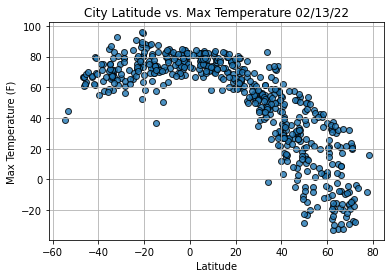

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

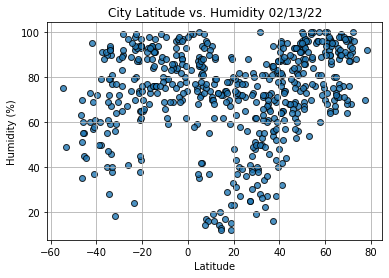

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

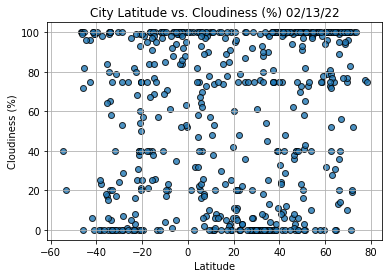

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

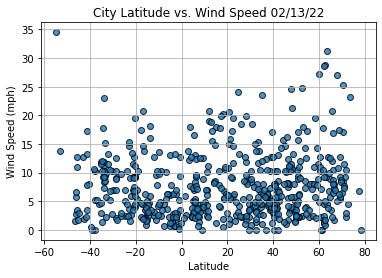

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,33.39,82,100,11.01,CA,2022-02-14 01:43:30
1,Adre,13.4667,22.2000,66.90,14,100,15.59,TD,2022-02-14 01:43:30
3,Thompson,55.7435,-97.8558,-18.24,76,0,2.30,CA,2022-02-14 01:43:31
5,Yellowknife,62.4560,-114.3525,-17.45,86,40,4.61,CA,2022-02-14 01:42:59
6,Polunochnoye,60.8697,60.4153,-5.85,100,96,2.21,RU,2022-02-14 01:43:33
...,...,...,...,...,...,...,...,...,...
553,Dordrecht,51.8100,4.6736,54.00,73,100,8.99,NL,2022-02-14 02:00:49
555,Robertsport,6.7533,-11.3686,78.89,88,6,7.20,LR,2022-02-14 02:00:50
556,Oistins,13.0667,-59.5333,76.66,73,6,18.79,BB,2022-02-14 02:00:51
557,Sobolevo,54.4299,31.8996,21.56,89,97,12.59,RU,2022-02-14 02:00:51


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,33.39,82,100,11.01,CA,2022-02-14 01:43:30
1,Adre,13.4667,22.2000,66.90,14,100,15.59,TD,2022-02-14 01:43:30
3,Thompson,55.7435,-97.8558,-18.24,76,0,2.30,CA,2022-02-14 01:43:31
5,Yellowknife,62.4560,-114.3525,-17.45,86,40,4.61,CA,2022-02-14 01:42:59
6,Polunochnoye,60.8697,60.4153,-5.85,100,96,2.21,RU,2022-02-14 01:43:33


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

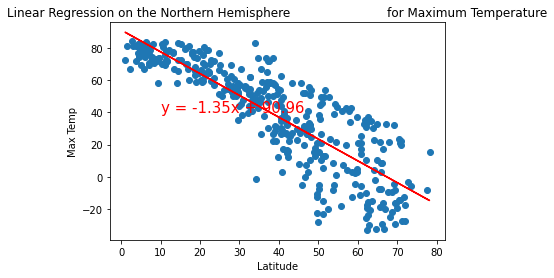

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

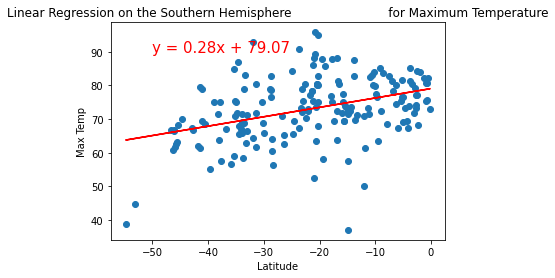

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

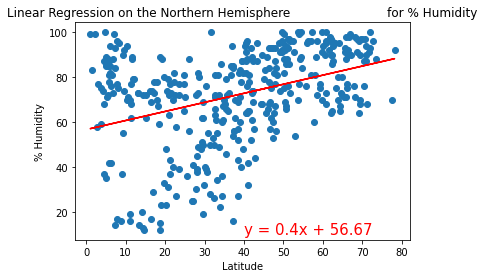

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

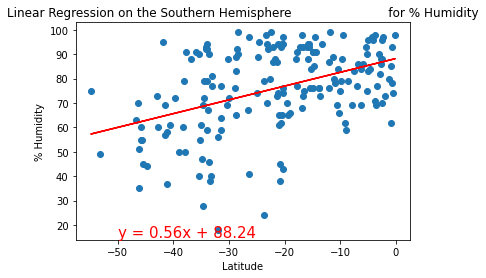

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

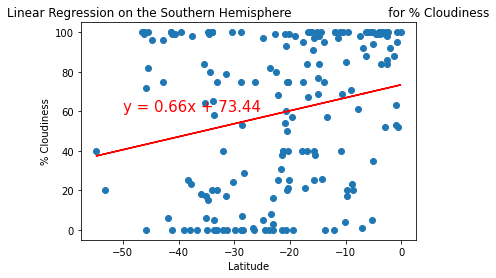

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

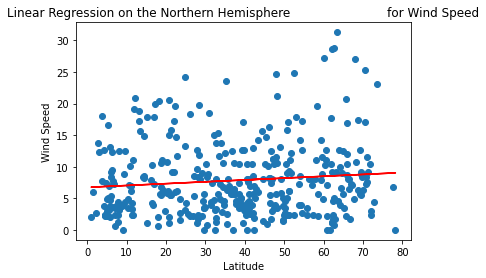

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

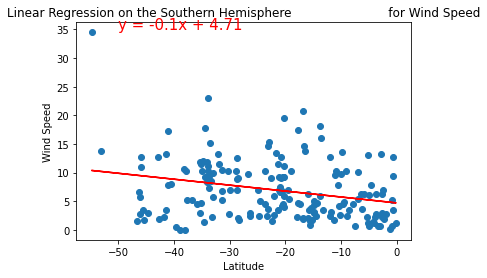

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))